In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # ITMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


In [3]:
import os
datapath = os.path.join("./datasets", "lifesat", "")

print("OK")

OK


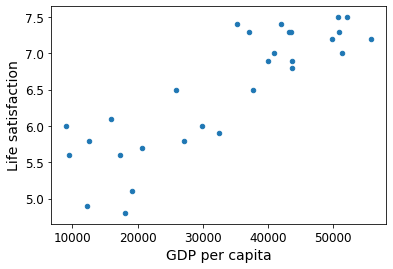

[[5.96242338]]
OK


In [5]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

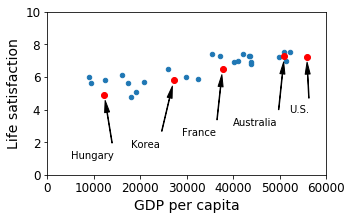

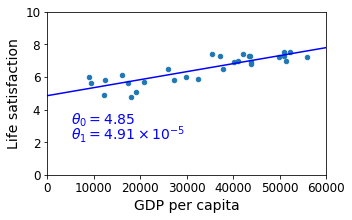

OK


In [6]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()


print("OK")

In [7]:
# TODO: add your code here..

print("Coef: ", model.coef_)
print("inter: ", model.intercept_)
print("R^2: ", model.score(X,y))


Coef:  [[4.91154459e-05]]
inter:  [4.8530528]
R^2:  0.7344414355437029


In [8]:
# this is our raw data set:
sample_data

GDP per capita  Life satisfaction
Country                                           
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Slovak Republic       15991.736                6.1
Estonia               17288.083                5.6
Greece                18064.288                4.8
Portugal              19121.592                5.1
Slovenia              20732.482                5.7
Spain                 25864.721                6.5
Korea                 27195.197                5.8
Italy                 29866.581                6.0
Japan                 32485.545                5.9
Israel                35343.336                7.4
New Zealand           37044.891                7.3
France                37675.006                6.5
Belgium               40106.632                6.9
Germany               40996.511                7.0
Finland               41973.988                7.4
Canada                43331.961                7.3
Netherlands           43603.115                7.3
Austria               43724.031                6.9
United Kingdom        43770.688                6.8
Sweden                49866.266                7.2
Iceland               50854.583                7.5
Australia             50961.865                7.3
Ireland               51350.744                7.0
Denmark               52114.165                7.5
United States         55805.204                7.2

In [9]:
# and this is our preprocessed data
country_stats

GDP per capita  Life satisfaction
Country                                           
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Slovak Republic       15991.736                6.1
Estonia               17288.083                5.6
Greece                18064.288                4.8
Portugal              19121.592                5.1
Slovenia              20732.482                5.7
Spain                 25864.721                6.5
Korea                 27195.197                5.8
Italy                 29866.581                6.0
Japan                 32485.545                5.9
Israel                35343.336                7.4
New Zealand           37044.891                7.3
France                37675.006                6.5
Belgium               40106.632                6.9
Germany               40996.511                7.0
Finland               41973.988                7.4
Canada                43331.961                7.3
Netherlands           43603.115                7.3
Austria               43724.031                6.9
United Kingdom        43770.688                6.8
Sweden                49866.266                7.2
Iceland               50854.583                7.5
Australia             50961.865                7.3
Ireland               51350.744                7.0
Denmark               52114.165                7.5
United States         55805.204                7.2

X.shape= (29, 1)
y.shape= (29, 1)


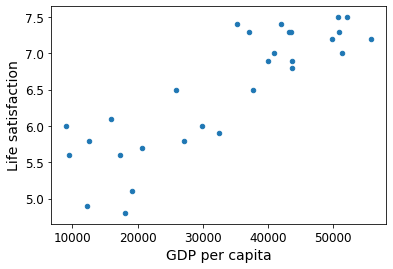

y pred  [[5.76666667]]
score 0.8525732853499179
OK


In [10]:
import sklearn.neighbors
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a model
knn=sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

#train
knn.fit(X, y)
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = knn.predict(X_new)
print("y pred ",y_pred) 
print("score", knn.score(X,y))

print("OK")

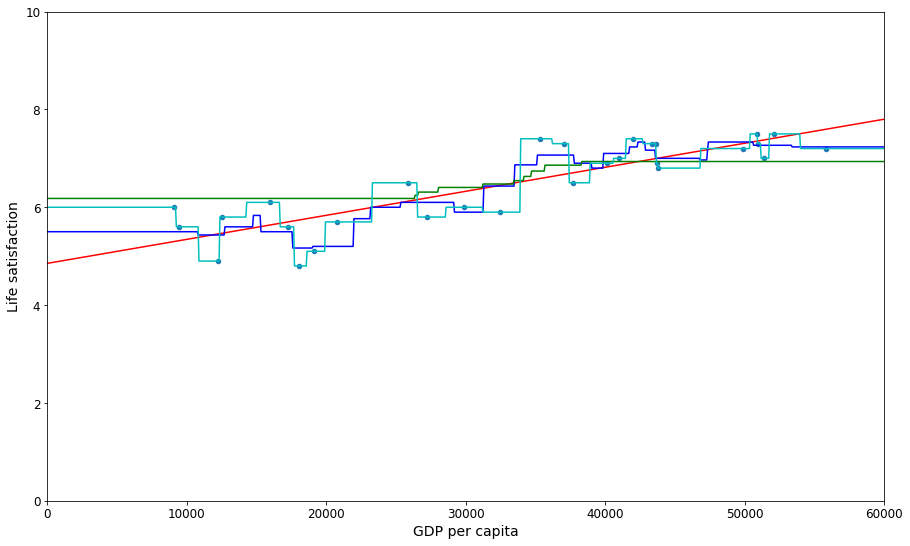

In [11]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5*3,3*3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

model = linear_model.LinearRegression()
knn=sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn2=sklearn.neighbors.KNeighborsRegressor(n_neighbors=20)
knn3=sklearn.neighbors.KNeighborsRegressor(n_neighbors=1)

knn.fit(X,y)
knn2.fit(X, y)
knn3.fit(X, y)
model.fit(X, y)
#train
#
#

#train
#knn3.fit(X, y)

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 
y_pred_knn2 = knn2.predict(M)
y_pred_knn3 = knn3.predict(M)


# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_knn2, "g")
plt.plot(m, y_pred_knn3, "c")

# TODO: add your code here..
#assert False, "TODO: try knn with different k_neighbor params, that is re-instantiate knn, refit and replot.."